<img src="images/ost_logo.png" width="240" height="240" align="left"/>
<div style="text-align: right"> Machine Learning MSE FTP_MachLe <br> HS 2020 <br> 
    <a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# Lab12: A4 Image Compression using `kMeans`

Clustering can be used to reduce colors in an image. Similar colors will be assigned to the same
cluster label or color palette. In In the following exercise, you will load an image as a $\left[ w, h, 3\right]$
`numpy.array` of type float64 , where $w$ and $h$ are the width and height in pixels respecively.
The last dimension of the three dimensional array are three the RGB color channels. Using
kMeans, we will reduce the color depth from 24 bits to 64 colors (6 bits) and to 16 colors (4
bits).

### (a) Reading an Image

Start by reading in an image from the Python imaging library PIL (https://en.wikipedia.org/wiki/Python_Imaging_Library) in your Jupyter notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

# First we read and flatten the image. 
original_img = np.array(Image.open('.\images\Hirsch.jpg'), dtype=np.float64) / 255
print(original_img.shape)
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)


(1960, 4032, 3)


### (b) Flatten the image

Flatten the image to a $\left[w \cdot h, 3 \right]$-dimensional numpy.array and shuffle the pixels using
sklearn.utils.shuffle.

In [2]:
image_flattened = np.reshape(original_img, (width * height, depth))

### (c) Quantization to 64 colors

Create an instance of the `kMeans` class called estimator. Use the `fit` method of `kMeans` to create sixty-four clusters (`n_clusters=64`) from a sample of one thousand randomly selected colors, e.g. the first 1000 colors of the shuffled pixels. The new color palette is given by the cluster centers that are accessible in `estimator.cluster_centers_`.
Each of the clusters will be a color in the compressed palette.

In [3]:
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=8, random_state=0)
estimator.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=64, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### (d) Prediction of the cluster assignment (labels)

Assign the cluster labels to each pixel in the original image using the `.predict` method
of your `kMeans` instance. Now, you know to which color in your reduced palette each pixel
belongs to, i.e. we predict the cluster assignment for each of the pixels in the original image.

In [4]:
cluster_assignments = estimator.predict(image_flattened)

### (e) Create a compressed image using only 64 colors

Finally, we create the compressed image from the compressed palette and cluster assignments. 

Loop over all pixels and assign the new color palette corresponding to the label of the
pixel and create a new, reduced color picture. Plot the images using plt.imshow, compare
the original image and the 64 color image. Try the same with 32 and 16 colors.


In [5]:
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1



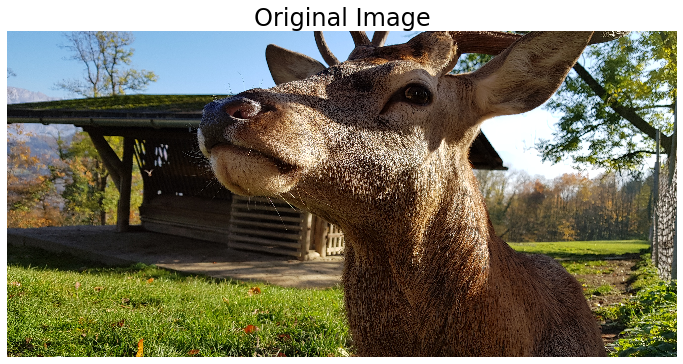

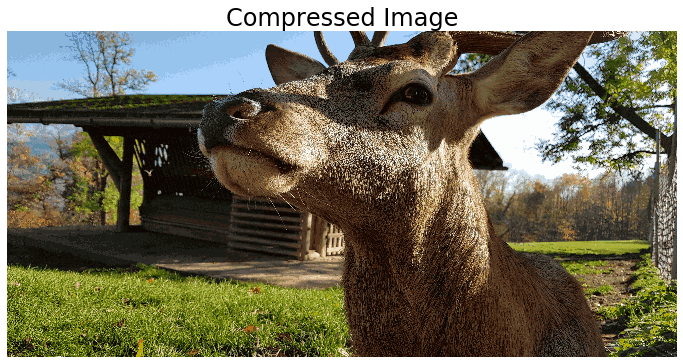

In [6]:
plt.figure(figsize=(12,12))
#plt.subplot(121)
plt.title('Original Image', fontsize=24)
plt.imshow(original_img, origin='lower')
plt.axis('off')
#plt.subplot(122)
plt.figure(figsize=(12,12))
plt.title('Compressed Image', fontsize=24)
plt.imshow(compressed_img,origin='lower')
plt.axis('off')
plt.show()